In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

## SF Temperatures

In [2]:
from vega_datasets import data
sf = data.sf_temps()

1.) Resample by the day and take the average temperature. Visualize the average temperature over time.

In [69]:
sf.sample()

,temp,date
4107,55.0,2010-06-21 04:00:00


In [70]:
sf.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [71]:
sf.date = pd.to_datetime(sf.date, format='%Y-%m-%d %H:%m:%s')

In [72]:
sf = sf.set_index('date')

In [73]:
sf.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


<AxesSubplot:xlabel='date'>

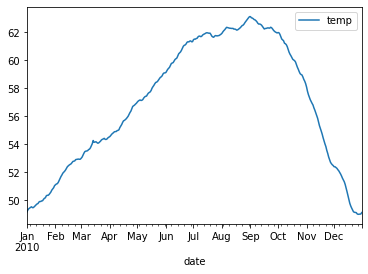

In [74]:
#average temperature over time
sf.resample('D').mean().plot()

2.) Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

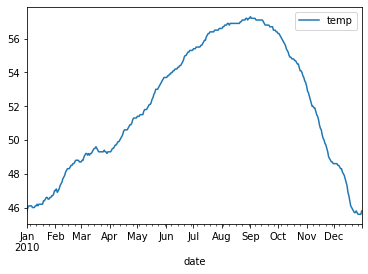

In [75]:
sf.resample('D').min().plot()

3.) Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

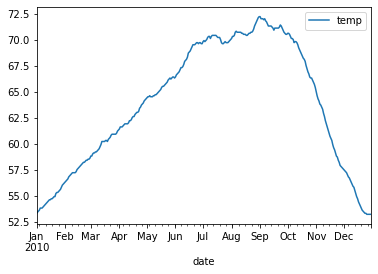

In [76]:
sf.resample('D').max().plot()

4.) Which month is the coldest, on average?

In [77]:
sf_avg_months = sf.resample('M').mean()
sf_avg_months

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


In [78]:
sf_avg_months.sort_values(by='temp').head(1)

,temp
date,
2010-01-31,49.98414


In [40]:
#January is the coldest month on average

5.) Which month has the highest average temperature?

In [79]:
sf_avg_months.sort_values(by='temp').tail(1)

,temp
date,
2010-09-30,62.487083


In [45]:
#September is the hottest month on average

6.) Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [80]:
sf_day = sf.resample('D').agg(['min', 'max'])

In [81]:
sf_day

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8
...          ...   ...
2010-12-27  45.6  53.2
2010-12-28  45.6  53.2
2010-12-29  45.6  53.2
2010-12-30  45.6  53.2
2010-12-31  45.8  53.2

[365 rows x 2 columns]

In [82]:
sf_day['max-min'] = sf_day.temp['max'] - sf_day.temp['min']

In [83]:
sf_day

temp       max-min
             min   max        
date                          
2010-01-01  45.8  53.3     7.5
2010-01-02  46.0  53.4     7.4
2010-01-03  46.1  53.5     7.4
2010-01-04  46.1  53.6     7.5
2010-01-05  46.1  53.8     7.7
...          ...   ...     ...
2010-12-27  45.6  53.2     7.6
2010-12-28  45.6  53.2     7.6
2010-12-29  45.6  53.2     7.6
2010-12-30  45.6  53.2     7.6
2010-12-31  45.8  53.2     7.4

[365 rows x 3 columns]

In [84]:
sf_day.sort_values(by='max-min').tail(1)

temp       max-min
             min   max        
date                          
2010-08-31  57.2  72.2    15.0

In [85]:
sf_day[sf_day['max-min'] == sf_day['max-min'].max()]

temp       max-min
             min   max        
date                          
2010-08-31  57.2  72.2    15.0

In [55]:
#August has the highest variance in temperature within the day

7.) Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

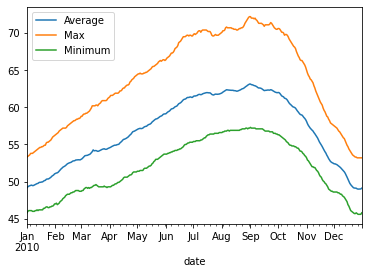

In [60]:
sf.resample('D').temp.mean().plot(label='Average')
sf.resample('D').temp.max().plot(label='Max')
sf.resample('D').temp.min().plot(label='Minimum')
plt.legend()
plt.show()

<br>

## Seattle Weather

In [86]:
from vega_datasets import data
data.seattle_weather()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [87]:
sw = data.seattle_weather()

In [88]:
sw.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

1.) Which year and month combination has the highest amount of precipitation?

In [89]:
sw.date = pd.to_datetime(sw.date, format='%Y-%m-%d')

In [90]:
sw = sw.set_index('date')

In [91]:
sw.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [104]:
sw.resample('m').mean()[sw.resample('m').precipitation.mean() == sw.resample('m').precipitation.mean().max()]

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,9.177419,8.380645,3.825806,4.341935


In [ ]:
#December 2015 had the highest amount of precipitation

2.) Visualize the amount of monthly precipitation over time.

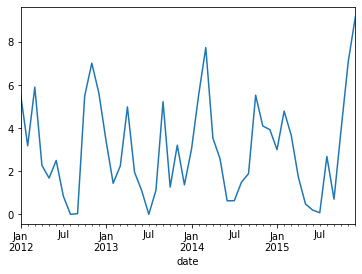

In [106]:
sw.resample('m').precipitation.mean().plot()
plt.show()

3.) Visualize the amount of wind over time. Choose a time interval you think is appropriate.

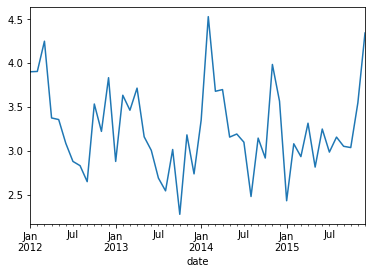

In [111]:
sw.resample('m').wind.mean().plot()
plt.show()

4.) Which year-month combination is the windiest?

In [112]:
sw.resample('m').mean()[sw.resample('m').wind.mean() == sw.resample('m').wind.mean().max()]

,precipitation,temp_max,temp_min,wind
date,,,,
2014-02-28,5.542857,8.2,2.635714,4.528571


In [113]:
#February 2014 is the windiest month

5.) What's the sunniest year? (Hint: which year has the highest number of days where weather == sun?)

In [117]:
sw.sample(5)

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2015-02-24,0.0,11.1,2.2,1.5,sun
2015-07-12,0.0,26.1,16.7,2.2,sun
2014-07-03,0.0,21.7,13.9,3.1,sun
2012-05-22,6.1,12.8,8.9,4.8,rain
2012-11-19,54.1,13.3,8.3,6.0,rain


In [118]:
sw['sunny'] = sw.weather=='sun'
sw.head()

,precipitation,temp_max,temp_min,wind,weather,sunny
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False
2012-01-02,10.9,10.6,2.8,4.5,rain,False
2012-01-03,0.8,11.7,7.2,2.3,rain,False
2012-01-04,20.3,12.2,5.6,4.7,rain,False
2012-01-05,1.3,8.9,2.8,6.1,rain,False


In [121]:
sw.sunny.resample('Y').sum().sort_values(ascending=False)

date
2014-12-31    211
2013-12-31    205
2015-12-31    180
2012-12-31    118
Name: sunny, dtype: int64

In [122]:
#2014 was the sunniest year

6.) In which month does it rain the most?

In [124]:
sw['month'] = sw.index.month
sw.head()

,precipitation,temp_max,temp_min,wind,weather,sunny,month
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,1
2012-01-02,10.9,10.6,2.8,4.5,rain,False,1
2012-01-03,0.8,11.7,7.2,2.3,rain,False,1
2012-01-04,20.3,12.2,5.6,4.7,rain,False,1
2012-01-05,1.3,8.9,2.8,6.1,rain,False,1


In [128]:
sw.groupby('month').precipitation.sum().sort_values(ascending=False)

month
11    642.5
12    622.7
3     606.2
10    503.4
1     466.0
2     422.0
4     375.4
9     235.5
5     207.5
8     163.7
6     132.9
7      48.2
Name: precipitation, dtype: float64

In [129]:
#November has the most rain

7.) Which month has the most number of days with a non-zero amount of precipitation?

In [130]:
sw.precipitation.value_counts()

0.0     838
0.3      54
0.5      40
1.0      26
1.5      25
       ... 
26.4      1
18.8      1
33.5      1
47.2      1
38.4      1
Name: precipitation, Length: 111, dtype: int64

In [132]:
sw['some_rain'] = sw.precipitation != 0.0
sw.head()

,precipitation,temp_max,temp_min,wind,weather,sunny,month,zero_rain,some_rain
date,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,1,True,False
2012-01-02,10.9,10.6,2.8,4.5,rain,False,1,False,True
2012-01-03,0.8,11.7,7.2,2.3,rain,False,1,False,True
2012-01-04,20.3,12.2,5.6,4.7,rain,False,1,False,True
2012-01-05,1.3,8.9,2.8,6.1,rain,False,1,False,True


In [138]:
sw.groupby('month').some_rain.mean().sort_values(ascending=False)

month
12    0.653226
2     0.646018
11    0.591667
3     0.588710
1     0.532258
10    0.491935
4     0.491667
6     0.308333
9     0.291667
5     0.274194
8     0.177419
7     0.088710
Name: some_rain, dtype: float64

In [ ]:
#December has the most number of days with non-zero precipitation

<br>

## Flights

In [149]:
flights = data.flights_20k()

In [150]:
flights.dtypes

date           datetime64[ns]
delay                   int64
distance                int64
origin                 object
destination            object
dtype: object

In [151]:
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [152]:
flights = data.flights_20k().set_index('date')

1.) Convert any negative delays to 0.

In [153]:
def neg_to_zero(x):
    if x<0:
        return 0
    else:
        return x 

In [154]:
flights.delay.apply(neg_to_zero)

date
2001-01-13 14:56:00    32
2001-01-31 16:40:00     0
2001-02-11 18:39:00     3
2001-01-10 21:00:00     0
2001-03-30 21:45:00     0
                       ..
2001-03-22 15:10:00     4
2001-01-19 13:05:00     0
2001-02-07 11:37:00     0
2001-02-24 16:50:00    42
2001-03-14 11:33:00     0
Name: delay, Length: 20000, dtype: int64

In [156]:
flights.delay = np.where(flights.delay<0, 0, flights.delay)

2.) Which hour of the day has the highest average delay?

In [157]:
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-13 14:56:00,32,417,SAN,SJC
2001-01-31 16:40:00,0,1093,FLL,ISP
2001-02-11 18:39:00,3,293,LBB,DAL
2001-01-10 21:00:00,0,550,MSY,MCO
2001-03-30 21:45:00,0,229,STL,IND


In [159]:
flights.resample('h').delay.mean()

date
2001-01-01 00:00:00    14.000000
2001-01-01 01:00:00          NaN
2001-01-01 02:00:00          NaN
2001-01-01 03:00:00          NaN
2001-01-01 04:00:00          NaN
                         ...    
2001-03-31 17:00:00    11.666667
2001-03-31 18:00:00    12.538462
2001-03-31 19:00:00    22.125000
2001-03-31 20:00:00    27.600000
2001-03-31 21:00:00    11.200000
Freq: H, Name: delay, Length: 2158, dtype: float64

In [160]:
flights['hour_of_day'] = flights.index.hour

In [164]:
flights.groupby('hour_of_day').delay.mean().sort_values(ascending=False)

hour_of_day
3     302.500000
1     170.000000
0     127.916667
23     65.353846
22     32.704607
21     21.626768
20     17.889778
19     16.256557
18     14.514218
16     13.881068
17     13.199580
15     13.137592
13     11.453311
14     10.747320
12      9.214341
11      7.361495
10      5.850953
9       5.002504
8       4.030483
7       3.071932
6       2.494856
5       0.513514
Name: delay, dtype: float64

In [165]:
#3rd hour of the day has highest average delay

3.) Does the day of the week make a difference in the delay amount?

In [168]:
flights['day_of_the_week'] = flights.index.day_name()

In [169]:
flights

,delay,distance,origin,destination,hour_of_day,day_of_the_week
date,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday
2001-03-30 21:45:00,0,229,STL,IND,21,Friday
...,...,...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK,15,Thursday
2001-01-19 13:05:00,0,1489,SEA,MCI,13,Friday
2001-02-07 11:37:00,0,1848,MCO,PHX,11,Wednesday


In [170]:
flights.groupby('day_of_the_week').delay.mean()

day_of_the_week
Friday       17.757596
Monday        7.165772
Saturday      8.431498
Sunday       10.413542
Thursday     12.821322
Tuesday       9.410866
Wednesday    11.032478
Name: delay, dtype: float64

<AxesSubplot:xlabel='day_of_the_week'>

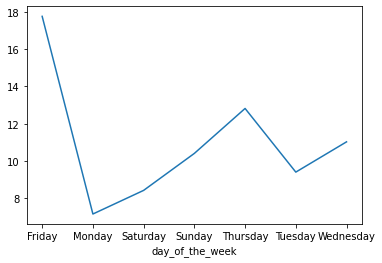

In [182]:
flights.groupby('day_of_the_week').delay.mean().plot()

In [179]:
#appears to be a difference depending on the day of the week

4.) Does the month make a difference in the delay amount?

In [184]:
flights['month'] = flights.index.month

In [185]:
flights

,delay,distance,origin,destination,hour_of_day,day_of_the_week,month
date,,,,,,,
2001-01-13 14:56:00,32,417,SAN,SJC,14,Saturday,1
2001-01-31 16:40:00,0,1093,FLL,ISP,16,Wednesday,1
2001-02-11 18:39:00,3,293,LBB,DAL,18,Sunday,2
2001-01-10 21:00:00,0,550,MSY,MCO,21,Wednesday,1
2001-03-30 21:45:00,0,229,STL,IND,21,Friday,3
...,...,...,...,...,...,...,...
2001-03-22 15:10:00,4,446,SAN,OAK,15,Thursday,3
2001-01-19 13:05:00,0,1489,SEA,MCI,13,Friday,1
2001-02-07 11:37:00,0,1848,MCO,PHX,11,Wednesday,2


In [186]:
flights.groupby('month').delay.mean()

month
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64

<AxesSubplot:xlabel='month'>

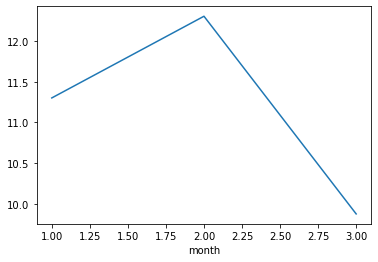

In [190]:
flights.groupby('month').delay.mean().plot()

In [191]:
#Not much of a difference depending on the month (the plot just looks a bit dramatic)

# Bonuses

<br>

## Iowa Electricity

In [241]:
ie = data.iowa_electricity()

In [242]:
ie.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [243]:
ie.year = pd.to_datetime(ie.year, format='%Y-%m-%d')

1.) For each row, calculate the percentage of the year's total that energy source provided.

In [244]:
ie = ie.pivot(index='year',columns='source')

In [245]:
ie

net_generation                          
source       Fossil Fuels Nuclear Energy Renewables
year                                               
2001-01-01          35361           3853       1437
2002-01-01          35991           4574       1963
2003-01-01          36234           3988       1885
2004-01-01          36205           4929       2102
2005-01-01          36883           4538       2724
2006-01-01          37014           5095       3364
2007-01-01          41389           4519       3870
2008-01-01          42734           5282       5070
2009-01-01          38620           4679       8560
2010-01-01          42750           4451      10308
2011-01-01          39361           5215      11795
2012-01-01          37379           4347      14949
2013-01-01          34873           5321      16476
2014-01-01          35250           4152      17452
2015-01-01          32319           5243      19091
2016-01-01          28437           4703      21241
2017-01-01          29329           5214      21933

In [246]:
ie.columns=['fossil_fuels','nuclear_energy','renewables']

In [247]:
ie.head(2)

,fossil_fuels,nuclear_energy,renewables
year,,,
2001-01-01,35361,3853,1437
2002-01-01,35991,4574,1963


In [248]:
ie['total_energy'] = ie.fossil_fuels + ie.nuclear_energy + ie.renewables

In [249]:
ie.head(2)

,fossil_fuels,nuclear_energy,renewables,total_energy
year,,,,
2001-01-01,35361,3853,1437,40651
2002-01-01,35991,4574,1963,42528


In [250]:
ie['fossil_fuel_percentage'] = (ie.fossil_fuels / ie.total_energy) *100
ie['nucleaer_energy_percentage'] = (ie.nuclear_energy / ie.total_energy) *100
ie['renewables_percentage'] = (ie.renewables / ie.total_energy) *100

In [251]:
ie.head()

,fossil_fuels,nuclear_energy,renewables,total_energy,fossil_fuel_percentage,nucleaer_energy_percentage,renewables_percentage
year,,,,,,,
2001-01-01,35361,3853,1437,40651,86.986790,9.478242,3.534968
2002-01-01,35991,4574,1963,42528,84.628950,10.755267,4.615783
2003-01-01,36234,3988,1885,42107,86.052200,9.471109,4.476690
2004-01-01,36205,4929,2102,43236,83.738089,11.400222,4.861689
2005-01-01,36883,4538,2724,44145,83.549666,10.279760,6.170574


2.) Lineplot of generation over time, color by source

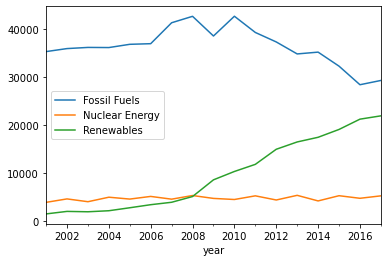

In [252]:
ie.fossil_fuels.plot(label='Fossil Fuels')
ie.nuclear_energy.plot(label='Nuclear Energy')
ie.renewables.plot(label='Renewables')
plt.legend()

3.) Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

In [253]:
ie.pivot_table(columns='year')

year,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01
fossil_fuel_percentage,86.986790,84.628950,86.052200,83.738089,83.549666,81.397753,83.147173,80.499567,74.471162,74.336191,69.824910,65.953242,61.536968,62.000915,57.047288,52.292161,51.931794
fossil_fuels,35361.000000,35991.000000,36234.000000,36205.000000,36883.000000,37014.000000,41389.000000,42734.000000,38620.000000,42750.000000,39361.000000,37379.000000,34873.000000,35250.000000,32319.000000,28437.000000,29329.000000
nucleaer_energy_percentage,9.478242,10.755267,9.471109,11.400222,10.279760,11.204451,9.078308,9.949893,9.022542,7.739658,9.251211,7.670049,9.389448,7.302916,9.254585,8.648241,9.232240
nuclear_energy,3853.000000,4574.000000,3988.000000,4929.000000,4538.000000,5095.000000,4519.000000,5282.000000,4679.000000,4451.000000,5215.000000,4347.000000,5321.000000,4152.000000,5243.000000,4703.000000,5214.000000
renewables,1437.000000,1963.000000,1885.000000,2102.000000,2724.000000,3364.000000,3870.000000,5070.000000,8560.000000,10308.000000,11795.000000,14949.000000,16476.000000,17452.000000,19091.000000,21241.000000,21933.000000
renewables_percentage,3.534968,4.615783,4.476690,4.861689,6.170574,7.397796,7.774519,9.550541,16.506296,17.924151,20.923879,26.376709,29.073584,30.696169,33.698127,39.059598,38.835966
total_energy,40651.000000,42528.000000,42107.000000,43236.000000,44145.000000,45473.000000,49778.000000,53086.000000,51859.000000,57509.000000,56371.000000,56675.000000,56670.000000,56854.000000,56653.000000,54381.000000,56476.000000


4.) Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

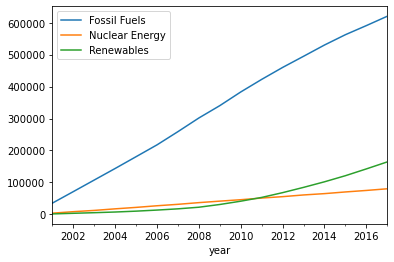

In [254]:
ie.fossil_fuels.cumsum().plot(label='Fossil Fuels')
ie.nuclear_energy.cumsum().plot(label='Nuclear Energy')
ie.renewables.cumsum().plot(label='Renewables')
plt.legend()

5.) Is the total generation increasing over time?

In [255]:
#yes, renewables is increasing more over time

5a.) How would you control for increasing consumption over time when considering how much energy is coming from each source?

In [256]:
#I'm going to take a wild guess that we evaluate each number as a percent of the year's total.

5b.) express each number as a % of the year's total

In [ ]:
#proportion of type over cumulative sum, 

### SF Temps

1.) Use SF Temps Dataset

In [13]:
df = data.sf_temps()

In [4]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [14]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d %H:%m:%s')

In [15]:
df = df.set_index('date')

In [16]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


2.) Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

In [19]:
df['temp_category']=pd.qcut(df.temp, 4, labels=['cold','cool','warm','hot'])

In [20]:
df.head()

,temp,temp_category
date,,
2010-01-01 00:00:00,47.8,cold
2010-01-01 01:00:00,47.4,cold
2010-01-01 02:00:00,46.9,cold
2010-01-01 03:00:00,46.5,cold
2010-01-01 04:00:00,46.0,cold


<br>

3.) How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.

In [21]:
temp_category_count = df.groupby('temp_category').resample('D').mean()

In [22]:
temp_category_count

temp
temp_category date                 
cold          2010-01-01  48.425000
              2010-01-02  48.560000
              2010-01-03  48.645000
              2010-01-04  48.690000
              2010-01-05  48.521053
...                             ...
hot           2010-11-11  61.775000
              2010-11-12  61.500000
              2010-11-13  61.400000
              2010-11-14  61.250000
              2010-11-15  60.900000

[1275 rows x 1 columns]